In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
import pickle
from sklearn.model_selection import cross_val_score

In [11]:
df=pd.read_csv('bank.txt')

In [12]:
df.head()

,1,2,3,4,5
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [13]:
df.describe()

,1,2,3,4,5
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [15]:
df.skew()

1   -0.149388
2   -0.394103
3    1.088569
4   -1.022243
5    0.223191
dtype: float64

In [18]:
plt.rcParams['figure.figsize']=(10,5)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021C641629B0>,
      dtype=object)

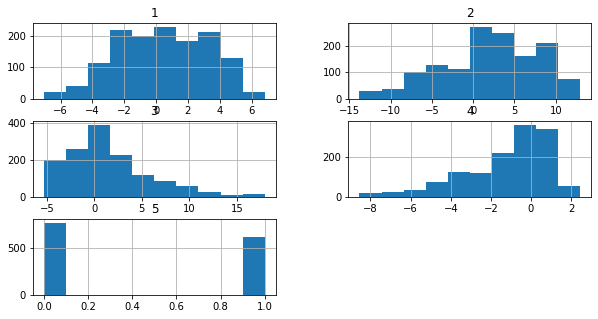

In [19]:
df.hist()

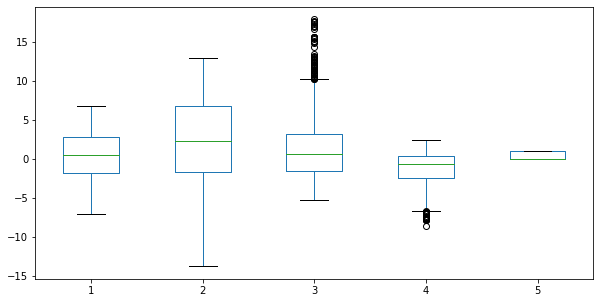

In [20]:
df.plot.box()

In [21]:
lr=LogisticRegression()

In [22]:
x=df.iloc[:,0:-1]

In [25]:
y=df.iloc[:,-1].values.reshape(-1,1)

In [26]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y)

In [27]:
lr.fit(xtrain,ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [28]:
lr.score(xtrain,ytrain)

0.9883381924198251

In [29]:
pred_lr=lr.predict(xtest)

In [30]:
accuracy_score(pred_lr,ytest)

0.9912536443148688

In [31]:
cv=cross_val_score(lr,x,y,cv=15,scoring='accuracy')

In [32]:
cv.mean()

0.9876328502415459

In [33]:
cv.std()

0.013105714229401958

In [35]:
confusion_matrix(pred_lr,ytest)

array([[188,   1],
       [  2, 152]], dtype=int64)

In [36]:
rfr=RandomForestClassifier()

In [37]:
rfr.fit(xtrain,ytrain)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [38]:
rfr.score(xtrain,ytrain)

1.0

In [39]:
pred_rfr=rfr.predict(xtest)

In [40]:
accuracy_score(pred_rfr,ytest)

0.9970845481049563

In [41]:
cvr=cross_val_score(rfr,x,y,cv=15,scoring='accuracy')

In [42]:
cvr.mean()

0.9927134540178018

In [44]:
cvr.std()

0.008632501244005945